<a href="https://colab.research.google.com/github/gabrielrflopes/estudos/blob/main/SpaceX_Falcon9_Launches_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpaceX Falcon 9 Launches Data

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Exploratory Data Analysis

#### Obtaining the data

The dataset for the SpaceX's launches was taken from Kaggle, in the following link:

[SpaceX Launches Data](https://www.kaggle.com/datasets/psycon/spacex-launches-data)

Using pandas, we will import it as a DataFrame and see its first 5 entries.

In [ ]:
data_path = 'https://raw.githubusercontent.com/gabrielrflopes/estudos/main/datasets/SpaceX_Launches_Data.csv'

df_spx = pd.read_csv(data_path, delimiter = ',')

df_spx.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


To get a better sense on the dimensions and the data distribution, we will see the last 5 entries too.

In [ ]:
df_spx.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
85,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,10,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,9,B1060,-80.577366,28.561857
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCSFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1062,-80.577366,28.561857


- **The dimensions of the dataset**

In [ ]:
print('This dataset contains',
      '\nRows:', df_spx.shape[0],
      '\nVariables:', df_spx.shape[1])

This dataset contains 
Rows: 90 
Variables: 17


Let's explore the variables names using the columns method.

In [ ]:
df_spx.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

- **The types of the variables**

In [ ]:
df_spx.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

Notice that `Date` is an object variable. We have to convert it to datetime:

In [ ]:
df_spx['Date'] = pd.to_datetime(df_spx['Date'])

print(df_spx['Date'].dtypes)

datetime64[ns]


- **Missing values**

Now, let's explore for missing values on the dataset. Initially, we'll visualize the proportions of NaN calculating the percentages of the missing values on the dataset in relation to the total number of entries.

In [ ]:
(df_spx.isna().sum() / df_spx.shape[0] * 100).sort_values(ascending = False).round(1)

LandingPad        28.9
FlightNumber       0.0
Reused             0.0
Longitude          0.0
Serial             0.0
ReusedCount        0.0
Block              0.0
Legs               0.0
GridFins           0.0
Date               0.0
Flights            0.0
Outcome            0.0
LaunchSite         0.0
Orbit              0.0
PayloadMass        0.0
BoosterVersion     0.0
Latitude           0.0
dtype: float64

As we can see, only the `LandingPad` variable has missing values. Let's look closer to this variable:

In [ ]:
df_spx['LandingPad'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: LandingPad, dtype: object

The first 5 entries are entirely NaN. Let's see a sample from this column to better understand how the NaN are distributed.

In [ ]:
df_spx['LandingPad'].sample(20)

26    5e9e3032383ecb267a34e7c7
59    5e9e3032383ecb267a34e7c7
76    5e9e3032383ecb6bb234e7ca
87    5e9e3032383ecb6bb234e7ca
77    5e9e3032383ecb6bb234e7ca
23    5e9e3032383ecb6bb234e7ca
21    5e9e3032383ecb6bb234e7ca
84    5e9e3032383ecb267a34e7c7
45                         NaN
39    5e9e3032383ecb6bb234e7ca
5                          NaN
43    5e9e3032383ecb267a34e7c7
62    5e9e3032383ecb6bb234e7ca
1                          NaN
30                         NaN
74    5e9e3032383ecb6bb234e7ca
34                         NaN
78    5e9e3032383ecb6bb234e7ca
7                          NaN
9                          NaN
Name: LandingPad, dtype: object

`LandingPad` refers to the landing facilities used to recover components of SpaceX's VTVL reusable launch vehicles. Not all of the launches utilizes the launchpad, so it's understandable that some of the data is labeled as NaN in this case.

- **Statistical summary**

Let's look now at some statistical descriptions from the dataset. First, the numerical variables:

In [ ]:
df_spx.describe().round(2)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.00,90.00,90.00,90.0,90.00,90.00,90.00
mean,45.50,6123.55,1.79,3.5,2.79,-86.37,29.45
std,26.12,4732.12,1.21,1.6,3.44,14.15,2.14
min,1.00,350.00,1.00,1.0,0.00,-120.61,28.56
25%,23.25,2510.75,1.00,2.0,0.00,-80.60,28.56
50%,45.50,4701.50,1.00,4.0,1.00,-80.58,28.56
75%,67.75,8912.75,2.00,5.0,4.00,-80.58,28.61
max,90.00,15600.00,6.00,5.0,10.00,-80.58,34.63


Now, the categorical variables that are interesting for some analysis.

In [ ]:
df_spx[['BoosterVersion', 'Orbit', 'LaunchSite']].describe()

,BoosterVersion,Orbit,LaunchSite
count,90,90,90
unique,1,11,3
top,Falcon 9,GTO,CCSFS SLC 40
freq,90,27,55


- **Visualizing the statistical distribution of the numerical variables**

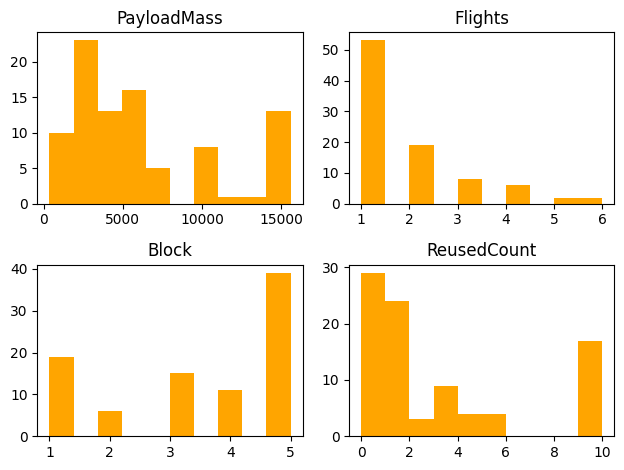

In [ ]:
fig, ax = plt.subplots(2, 2)

df_spx[['PayloadMass', 'Flights', 'Block', 'ReusedCount']].hist(ax = ax, grid = False, color = 'orange')

fig.tight_layout()
fig.show()

- **Correlation matrix**

The correlation matrix will be used to search for relationships between the variables, in order to guide our analysis based on this new information.

In [ ]:
corr = df_spx[['PayloadMass', 'Flights', 'ReusedCount', 'Block']].corr()

Text(0.5, 1.0, 'Correlation Matrix')

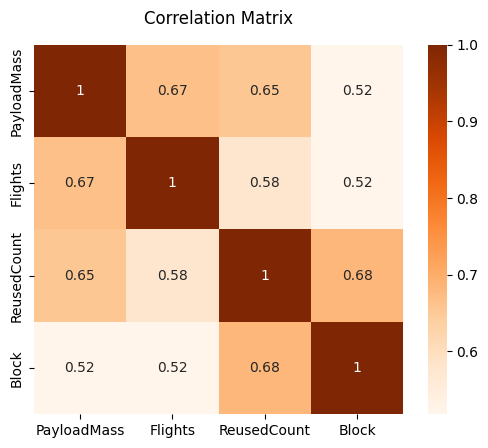

In [ ]:
fig, ax = plt.subplots()

sns.heatmap(data = corr, square = True, annot = True, cmap = 'Oranges', cbar = True, ax = ax)

ax.set_title('Correlation Matrix', pad = 15)

Something that is very important to keep in mind is that the correlation matrix doesn't show a cause x effect relationship between variables. In this case, we can see that most of the variables are moderately related. 

For instance, `Flights` and `PayloadMass` are related, probably because with the more flights you have, the data on payload mass increases.

### Data visualization

#### Most frequent orbits for the missions

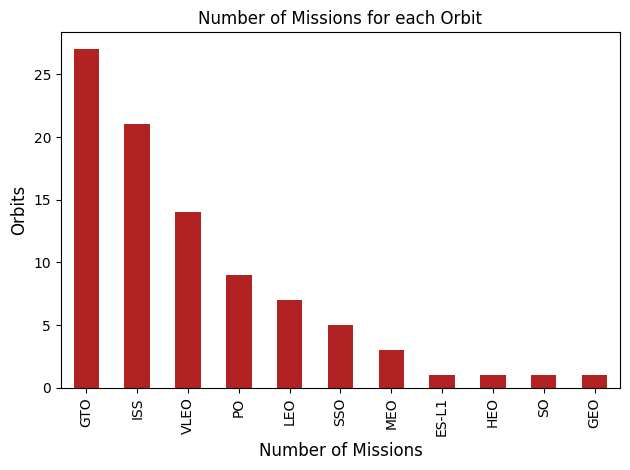

In [ ]:
fig, ax = plt.subplots()

df_spx['Orbit'].value_counts().plot(kind = 'bar', color = 'firebrick', ax = ax)

ax.set_title('Number of Missions for each Orbit', fontweight = 'medium')
ax.set_xlabel('Number of Missions', fontsize = 12)
ax.set_ylabel('Orbits', fontsize = 12)

fig.tight_layout()
fig.show()

#### Grouping the `PayloadMass` Variable

The `PayloadMass` variable is a numerical variable that ranges from 350 Kg to 15600 Kg. In the following lines, we will put this variable into bins, in order to get better comparisons with the categorical variables.

In [ ]:
df_spx['PayloadMass'] = df_spx['PayloadMass'].astype('int64')

We will use `np.linspace` to create bins that ranges from the minimum value of `PayloadMass`to the maximum value, dividing into 3 equal sized bins. 



In [ ]:
bins = np.linspace(df_spx['PayloadMass'].min(), df_spx['PayloadMass'].max(), 4)

print(bins)

group_names = ['Low mass', 'Medium mass', 'High mass']

[  350.          5433.33333333 10516.66666667 15600.        ]


So the first bin will go from 350 Kg to 5433 Kg, and so on. Now we will include this column into the existing DataFrame:

In [ ]:
df_spx['PayloadMassGroups'] = pd.cut(df_spx['PayloadMass'], bins, labels = group_names, include_lowest = True) 

df_spx[['PayloadMass', 'PayloadMassGroups']].head()

,PayloadMass,PayloadMassGroups
0,6123,Medium mass
1,525,Low mass
2,677,Low mass
3,500,Low mass
4,3170,Low mass


#### **Payload Mass Distribution**

In [ ]:
labels = df_spx['PayloadMassGroups'].unique().sort_values(ascending = False).tolist()

In [ ]:
df_spx['PayloadMassGroups'].value_counts()

Low mass       52
Medium mass    23
High mass      15
Name: PayloadMassGroups, dtype: int64

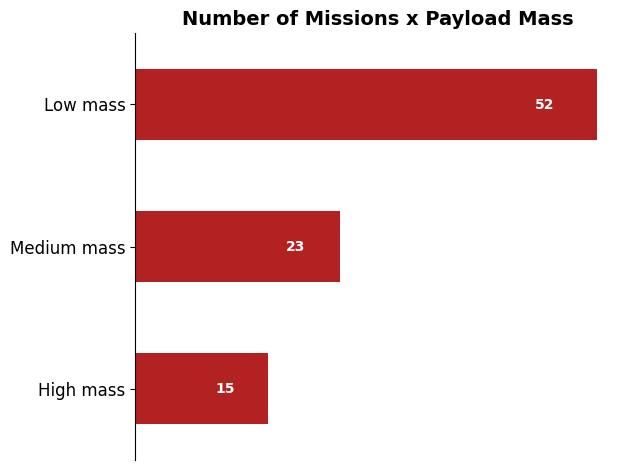

In [ ]:
fig, ax = plt.subplots()

df_spx['PayloadMassGroups'].value_counts()[:-4:-1].plot(kind = 'barh', grid = False, ax = ax, color = 'firebrick')

ax.set_title('Number of Missions x Payload Mass', fontweight = 'heavy', fontsize = 14)
ax.spines[['top', 'right', 'bottom']].set_visible(False)

ax.set_yticklabels(labels = labels, fontsize = 12)
ax.set_xticks([])

ax.text(45, 1.97, '52', color = 'White', fontweight = 'heavy')
ax.text(17, 0.97, '23', color = 'White', fontweight = 'heavy')
ax.text(9, -0.03, '15', color = 'White', fontweight = 'heavy')



fig.tight_layout()
fig.show()

### Distribution of payload mass on Falcon 9 for each orbit

Now that we've got the `PayloadMass` grouped as a categorical variable, we can use this to cross with informations regarding the orbits in which the payload masses are greater or smaller.

Just in case it is not clear, the payload mass is the amount of mass the rocket is carrying in its payload module. It can be a satellite, space probe, or even spacecraft carrying humans, animals, or cargo.

To do this analysis, we will identify the entries that have low mass payloads, and see which orbit is related to that mission. For that, we can use `.loc[]`, to localize those entries, and `.value_counts()`, to count how many entries for which orbit. 

In [ ]:
y1 = df_spx.loc[df_spx['PayloadMassGroups'] == 'Low mass']['Orbit'].value_counts()

y1

ISS      19
GTO      17
SSO       5
LEO       4
MEO       3
PO        2
ES-L1     1
HEO       1
Name: Orbit, dtype: int64

In [ ]:
y2 = df_spx.loc[df_spx['PayloadMassGroups'] == 'Medium mass']['Orbit'].value_counts()

y2

GTO    10
PO      7
LEO     3
SO      1
ISS     1
GEO     1
Name: Orbit, dtype: int64

In [ ]:
y3 = df_spx.loc[df_spx['PayloadMassGroups'] == 'High mass']['Orbit'].value_counts()

y3

VLEO    14
ISS      1
Name: Orbit, dtype: int64

Now that all the information is gathered, we can create a new DataFrame with only this information, and then do the plotting.

In [ ]:
dict = {'index': ['GTO', 'ISS', 'VLEO', 'PO', 'LEO'],
        'y1': [17, 19, 0, 2, 4],
        'y2': [10, 1, 0, 7, 3],
        'y3': [0, 1, 14, 0, 0]}

df_mass_orbit = pd.DataFrame(dict)
df_mass_orbit.set_index('index', inplace = True)

df_mass_orbit

,y1,y2,y3
index,,,
GTO,17,10,0
ISS,19,1,1
VLEO,0,0,14
PO,2,7,0
LEO,4,3,0


In [ ]:
x_orb = ['GTO', 'ISS', 'VLEO', 'PO', 'LEO']

#### Payload Mass for each Orbit distribution

In [ ]:
coral = '#f85959'
lightorange = '#ff9f68'
lightyellow = '#f3f169'
gray_text = '#575151'

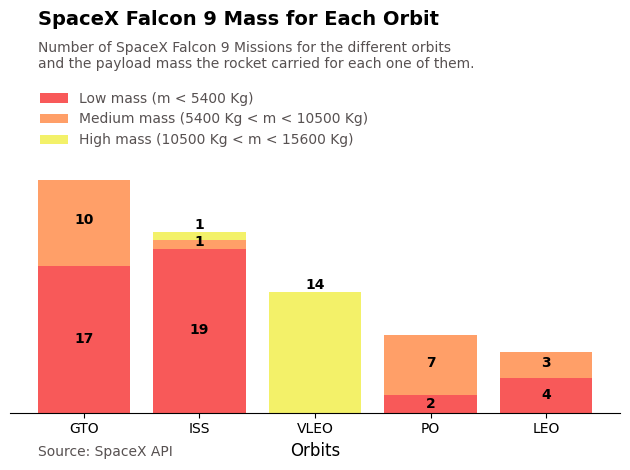

In [ ]:
fig, ax = plt.subplots()

# definindo variáveis para os plots de barras
bars1 = ax.bar(x_orb, df_mass_orbit['y1'], color = coral, 
               label = 'Low mass (m < 5400 Kg)')

bars2 = ax.bar(x_orb, df_mass_orbit['y2'], bottom = df_mass_orbit['y1'], 
               color = lightorange, label = 'Medium mass (5400 Kg < m < 10500 Kg)')

bars3 = ax.bar(x_orb, df_mass_orbit['y3'], bottom = df_mass_orbit['y1'] + df_mass_orbit['y2'], 
               color = lightyellow, label = 'High mass (10500 Kg < m < 15600 Kg)')

# manipulating the Axes object
ax.set_xlabel('Orbits', fontsize = 12)
#ax.set_ylabel('Number of Missions', fontsize = 12)
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_yticklabels('')
ax.tick_params(left = False)
ax.set_ylim(0, 45)
ax.legend(frameon = False, labelcolor = gray_text, alignment = 'left', loc = (0.04, 0.67))

for bar1, bar2, bar3 in zip(bars1, bars2, bars3):

    height1 = bar1.get_height()
    height2 = bar2.get_height()
    height3 = bar3.get_height()

    total_height = height1 + height2 + height3

    if height1 > 0:
      ax.text(bar1.get_x() + bar1.get_width() / 2., height1 / 2 - 0.75, '%d' % int(height1), ha='center', va='bottom', fontweight = 'heavy')
    if height2 > 0:
      ax.text(bar2.get_x() + bar2.get_width() / 2., height1 + height2 / 2 - 0.5, '%d' % int(height2), ha='center', va='bottom', fontweight = 'heavy')
    if height3 > 0:
      ax.text(bar3.get_x() + bar3.get_width() / 2., total_height, '%d' % int(height3), ha='center', va='bottom', fontweight = 'heavy')

ax.text(-0.4, 45, 'SpaceX Falcon 9 Mass for Each Orbit', fontweight = 'heavy', fontsize = 14)
ax.text(-0.4, 40, 'Number of SpaceX Falcon 9 Missions for the different orbits\nand the payload mass the rocket carried for each one of them.', 
        fontweight = 'medium', fontsize = 10, color = gray_text)

ax.text(-0.4, -5, 'Source: SpaceX API', color = gray_text)


fig.tight_layout()
fig.show()

plt.savefig('spacex_mass_orbit.png')

We can see from the figure above the distribution of payload mass for each orbit, with the information of how many missions occurred for each of the low, medium and high mass payloads.

The majority of missions happens with low mass, which is expected. Missions with high mass are more expensive and demand more planning, so they happen only for VLEO, i.e, Very Low Earth Orbits. 

Most of the missions with low and medium mass occur in a Geostationary Transfer Orbit. A GTO is a highly elliptical orbit used to transfer a spacecraft from a low Earth orbit to a geostationary orbit. A geostationary orbit is an orbit around the Earth at an altitude of approximately 36,000 kilometers, where the orbital period of the spacecraft is equal to the rotation period of the Earth, resulting in the spacecraft appearing stationary in the sky relative to an observer on the ground.

### Launch Sites

Closing our analysis, we can visualize the more frequent launch sites for the SpaceX's Falcon 9 missions. 

<Axes: >

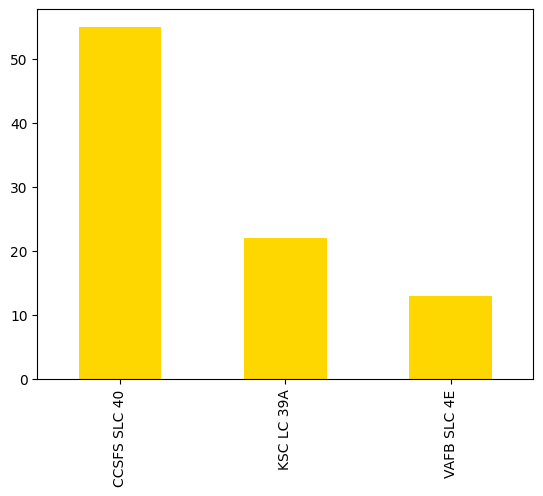

In [ ]:
df_spx['LaunchSite'].value_counts().plot(kind = 'bar', color = 'gold')

We can see that most of the missions are launched from Florida, on Cape Canaveral Space Force Station (CCSFS) and Kennedy Space Center Launch Complex 39A.

The third one is Vandenberg Space Launch Complex 4, located on California.

### Map of the Launch Sites

In [ ]:
df_spx.loc[df_spx['LaunchSite'] == 'VAFB SLC 4E'][['Latitude', 'Longitude']].iloc[0]

Latitude      34.632093
Longitude   -120.610829
Name: 3, dtype: float64

In [ ]:
df_spx.loc[df_spx['LaunchSite'] == 'KSC LC 39A'][['Latitude', 'Longitude']].iloc[0]

Latitude     28.608058
Longitude   -80.603956
Name: 26, dtype: float64

In [ ]:
df_spx.loc[df_spx['LaunchSite'] == 'CCSFS SLC 40'][['Latitude', 'Longitude']].iloc[0]

Latitude     28.561857
Longitude   -80.577366
Name: 0, dtype: float64

In [ ]:
import folium 

usa = folium.Map(location = [28.5554521, -80.6090207], zoom_start = 10)

In [ ]:
folium.Marker(location = [34.632093,  -120.610829]).add_to(usa)
folium.Marker(location = [28.608058, -80.603956]).add_to(usa)
folium.Marker(location = [28.561857, -80.577366]).add_to(usa)

In [ ]:
usa